# CREDIT RISK PREDICTION

### Project: Credit Risk Prediction Model                                                       
### Author: Nazly Rafa Oktafian Nuzqu
### Date: 30 June 2025

Pada final project ini kita akan membantu clien untuk meningkatkan keakuratan dalam menilai dan mengelola risiko kredit, sehingga dapat mengoptimalkan keputusan bisnis dan mengurangi potensi kerugian yang ada. Client ini merupakan sebuah perusahaan pemberi pinjaman (multifinance).Dimana juga perlu memahami penentuan peminjaman yang disetujui atau tidak disetujui.

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, f_oneway

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

### DATA UNDERSTANDING

In [4]:
# Load Dataset
df = pd.read_csv('loan_data_2007_2014.csv')

In [5]:
# Check Dimension
df.shape

(466285, 75)

In [6]:
# Display Columns
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [7]:
df.dtypes.value_counts()

float64    46
object     22
int64       7
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [10]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dtypes

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object


TARGET VARIABLE ANALYSIS
Loan Status Distribution:
loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Percentage Distribution:
loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                       

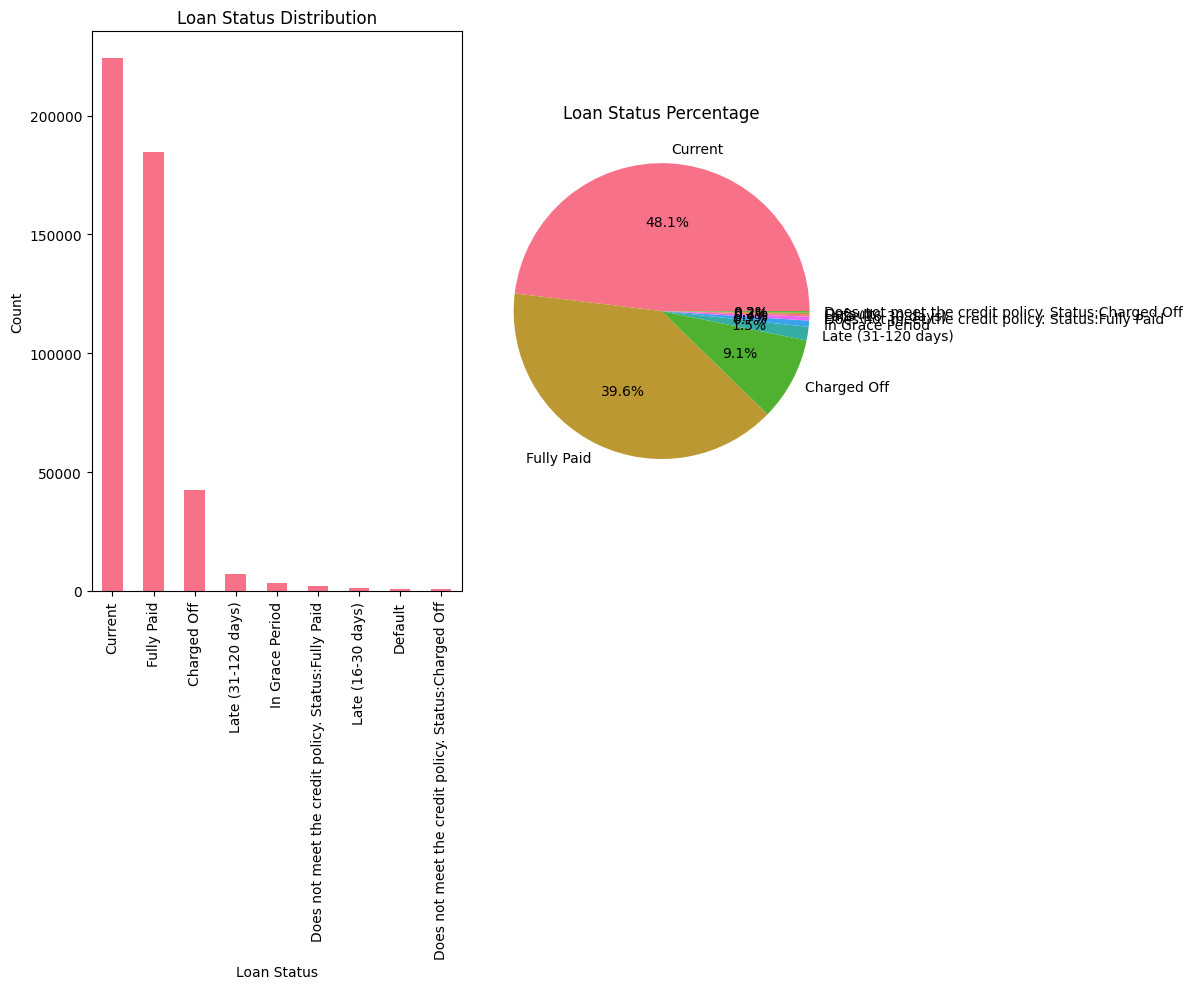

In [15]:
# Identify Target Variable
# Check loan_status column (potential target)
print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)

if 'loan_status' in df.columns:
    print("Loan Status Distribution:")
    print(df['loan_status'].value_counts())
    print(f"\nPercentage Distribution:")
    print(df['loan_status'].value_counts(normalize=True) * 100)
    
    # Visualize target distribution
    plt.figure(figsize=(12, 10))
    
    plt.subplot(1, 2, 1)
    df['loan_status'].value_counts().plot(kind='bar')
    plt.title('Loan Status Distribution')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%',)
    plt.title('Loan Status Percentage')
    plt.ylabel('')
    
    plt.tight_layout()
    plt.show()


MISSING VALUES ANALYSIS
Columns with Missing Values: 40

Top 15 Columns with Most Missing Values:
                       Column  Missing_Count  Missing_Percentage
69                 max_bal_bc         466285               100.0
68                open_rv_24m         466285               100.0
72                     inq_fi         466285               100.0
67                open_rv_12m         466285               100.0
66                    il_util         466285               100.0
64         mths_since_rcnt_il         466285               100.0
65               total_bal_il         466285               100.0
63                open_il_24m         466285               100.0
62                open_il_12m         466285               100.0
61                 open_il_6m         466285               100.0
60                open_acc_6m         466285               100.0
55                  dti_joint         466285               100.0
54           annual_inc_joint         466285            

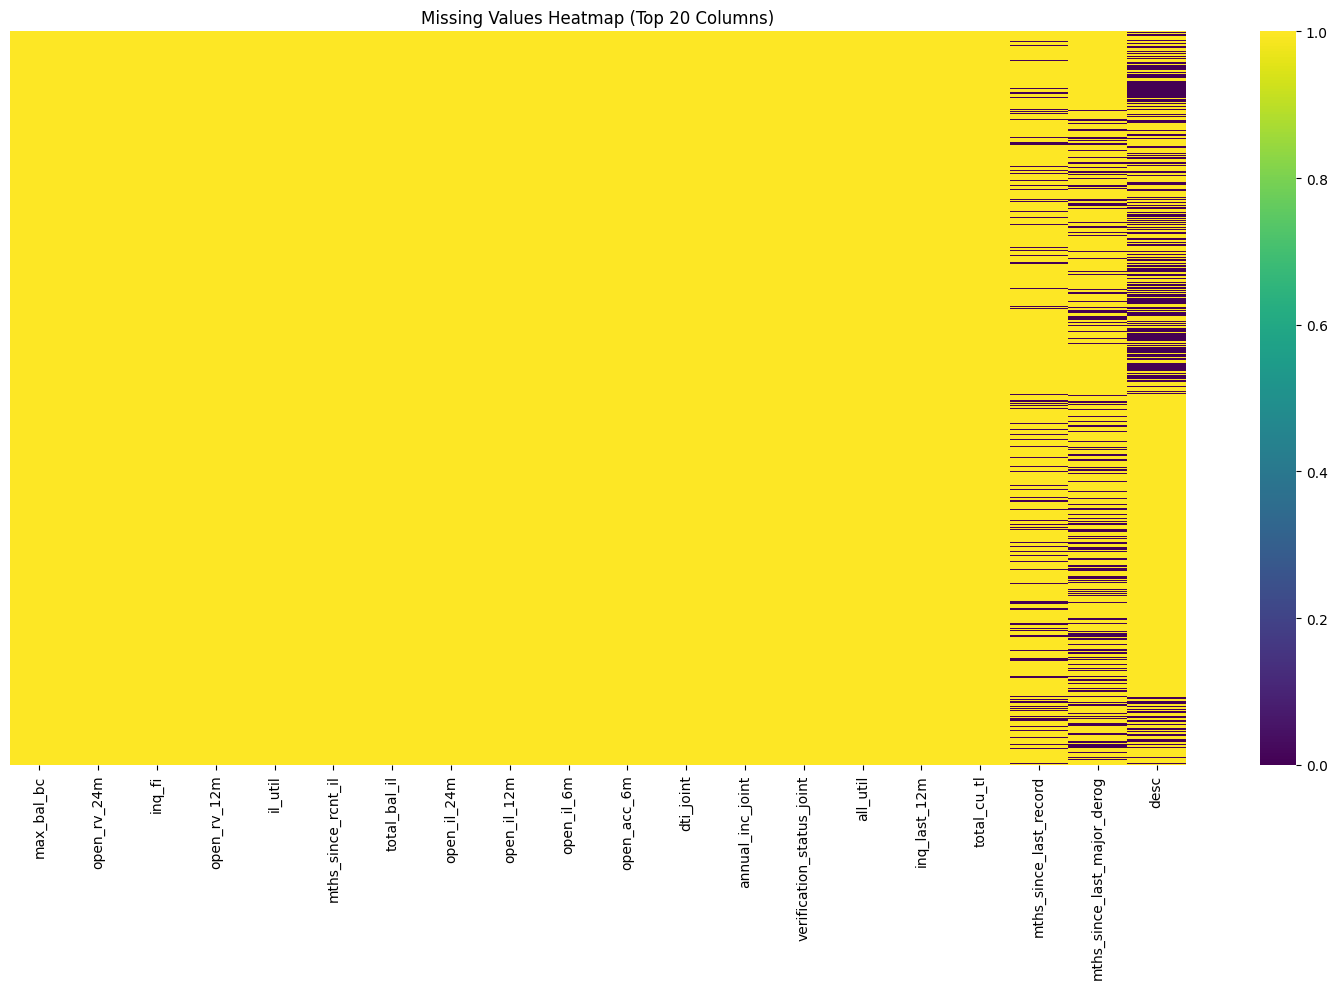

In [17]:
# Missing Value Analysis
print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Percentage', ascending=False)

# Show columns with missing values
missing_columns = missing_df[missing_df['Missing_Count'] > 0]
print(f"Columns with Missing Values: {len(missing_columns)}")
print("\nTop 15 Columns with Most Missing Values:")
print(missing_columns.head(15))

# Visualize missing values
plt.figure(figsize=(15, 10))
missing_cols_to_plot = missing_columns.head(20)['Column'].tolist()
if missing_cols_to_plot:
    sns.heatmap(df[missing_cols_to_plot].isnull(), 
                yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap (Top 20 Columns)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### EXPLORATORY DATA ANALYSIS (EDA)

In [18]:
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Categorize columns by importance for credit risk
id_cols = ['Unnamed: 0', 'id', 'member_id', 'url']
text_cols = ['desc', 'title', 'emp_title']
target_cols = ['loan_status', 'pymnt_plan']

# Core financial features (most important for credit risk)
financial_core = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 
                  'annual_inc', 'dti', 'revol_bal', 'revol_util']

# Credit history features
credit_history = ['grade', 'sub_grade', 'delinq_2yrs', 'earliest_cr_line',
                  'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc']

# Demographics and employment
demo_cols = ['emp_length', 'home_ownership', 'verification_status', 
             'addr_state', 'purpose', 'term']

print("Feature Categories:")
print(f"Core Financial Features: {len(financial_core)}")
print(f"Credit History Features: {len(credit_history)}")
print(f"Demographics Features: {len(demo_cols)}")


EXPLORATORY DATA ANALYSIS
Feature Categories:
Core Financial Features: 8
Credit History Features: 8
Demographics Features: 6


In [19]:
# Target Variable Creation/Engineering

# Create binary target variable (Good = 0, Bad = 1)
target_mapping = {
    'Fully Paid': 0,          # Good loan
    'Current': 0,             # Good loan (still paying)
    'Charged Off': 1,         # Bad loan
    'Default': 1,             # Bad loan
    'Late (31-120 days)': 1,  # Bad loan
    'Late (16-30 days)': 1,   # Bad loan
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1
}

# Apply mapping if loan_status exists
if 'loan_status' in df.columns:
    df['target'] = df['loan_status'].map(target_mapping)
    print(f"\nTarget Variable Created:")
    print(f"Good Loans (0): {(df['target'] == 0).sum():,}")
    print(f"Bad Loans (1): {(df['target'] == 1).sum():,}")
    print(f"Missing/Unknown: {df['target'].isnull().sum():,}")


Target Variable Created:
Good Loans (0): 410,953
Bad Loans (1): 52,186
Missing/Unknown: 3,146



UNIVARIATE ANALYSIS - NUMERICAL FEATURES
Analyzing 8 key numerical features...


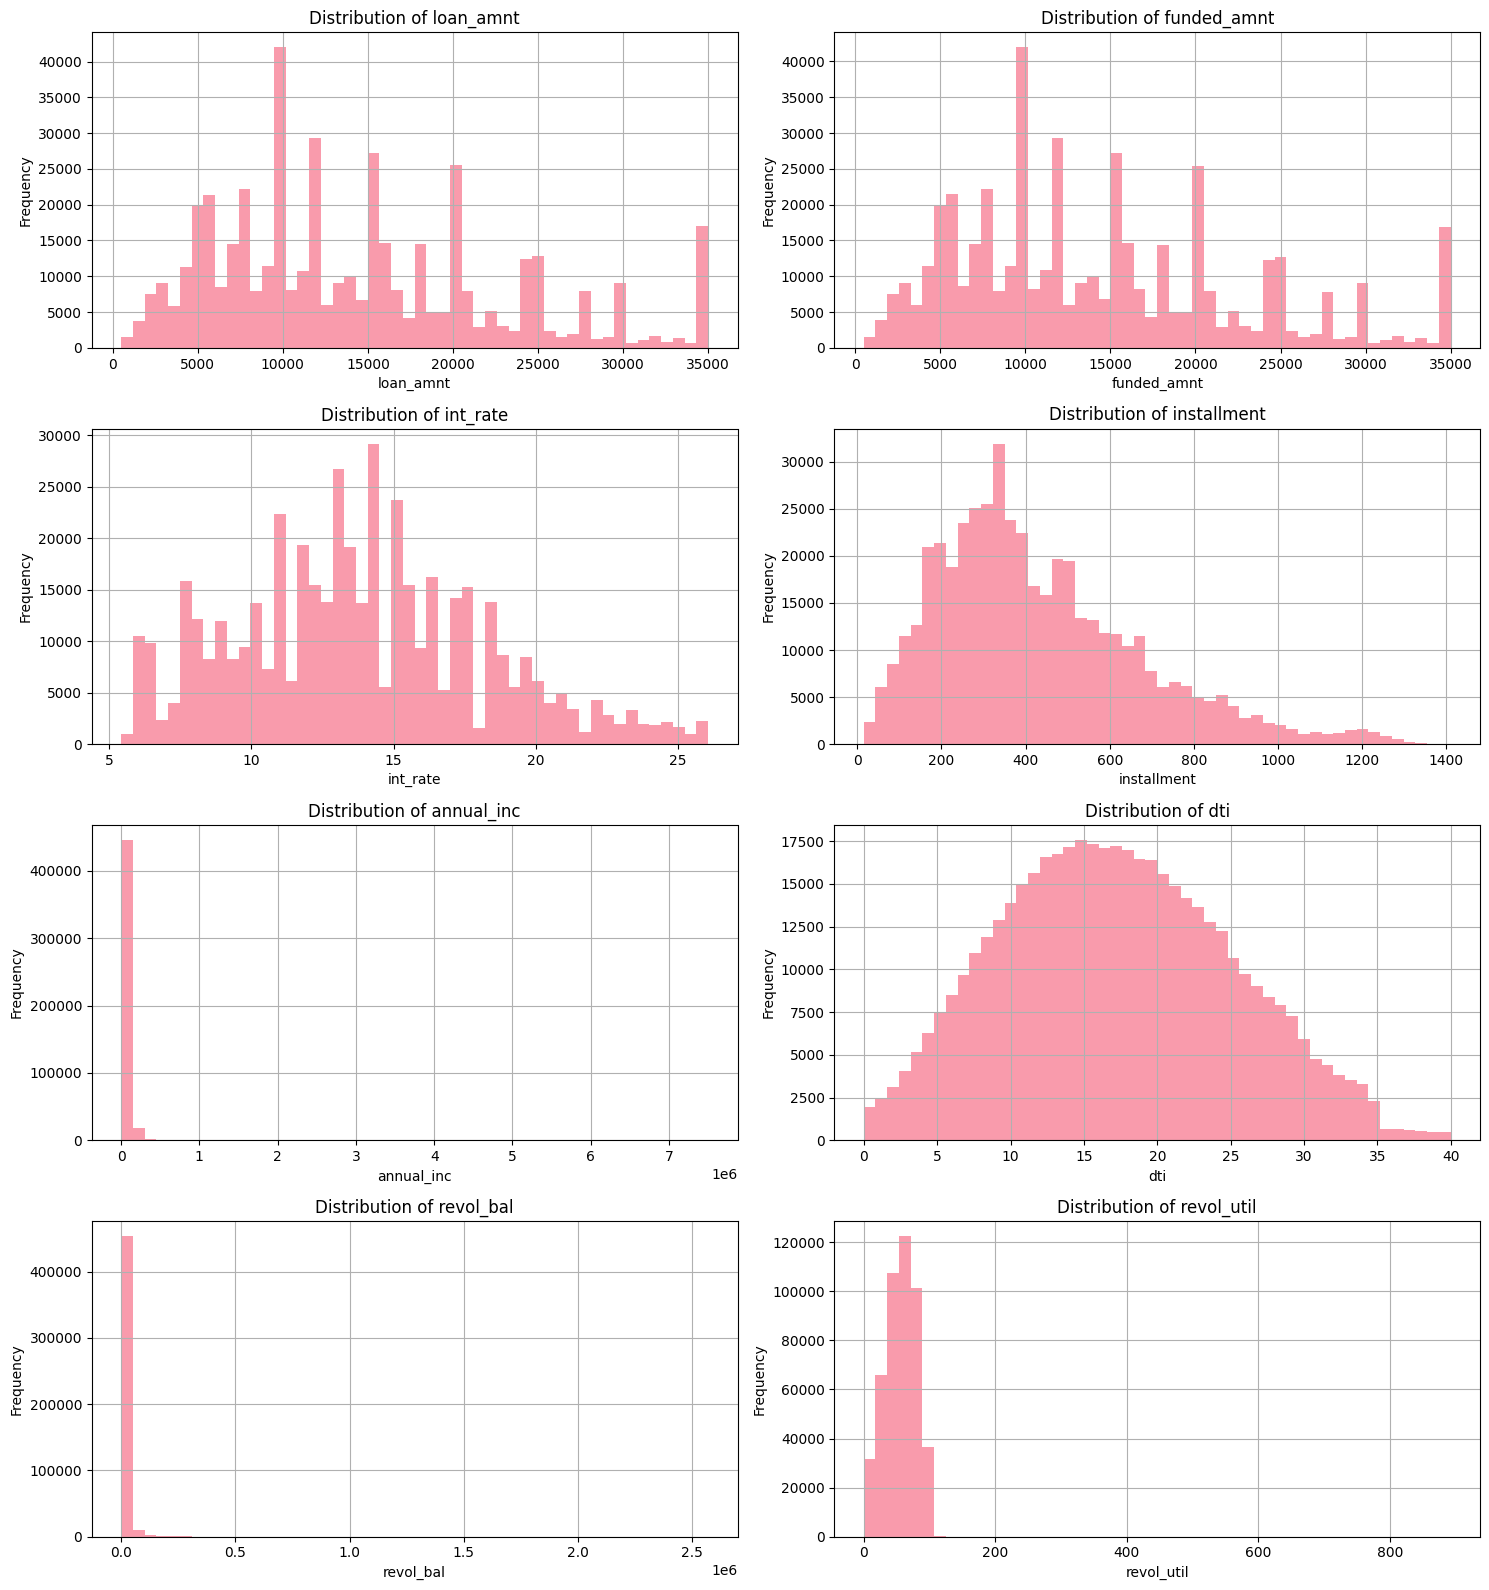

In [20]:
# Univariate Analysis - Numerical Features

print("\n" + "="*50)
print("UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("="*50)

# Select numerical columns for analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove identifier columns
numerical_cols = [col for col in numerical_cols if col not in id_cols + ['target']]

# Focus on most important numerical features first
important_numerical = [col for col in financial_core + credit_history if col in numerical_cols][:8]

print(f"Analyzing {len(important_numerical)} key numerical features...")

# Create subplots for distributions
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()

for i, col in enumerate(important_numerical):
    if col in df.columns:
        # Distribution plot
        df[col].hist(bins=50, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
# Statistical summary for key numerical features
print("\nStatistical Summary of Key Numerical Features:")
if important_numerical:
    print(df[important_numerical].describe())


Statistical Summary of Key Numerical Features:
           loan_amnt    funded_amnt       int_rate    installment  \
count  466285.000000  466285.000000  466285.000000  466285.000000   
mean    14317.277577   14291.801044      13.829236     432.061201   
std      8286.509164    8274.371300       4.357587     243.485550   
min       500.000000     500.000000       5.420000      15.670000   
25%      8000.000000    8000.000000      10.990000     256.690000   
50%     12000.000000   12000.000000      13.660000     379.890000   
75%     20000.000000   20000.000000      16.490000     566.580000   
max     35000.000000   35000.000000      26.060000    1409.990000   

         annual_inc            dti     revol_bal     revol_util  
count  4.662810e+05  466285.000000  4.662850e+05  465945.000000  
mean   7.327738e+04      17.218758  1.623020e+04      56.176947  
std    5.496357e+04       7.851121  2.067625e+04      23.732628  
min    1.896000e+03       0.000000  0.000000e+00       0.000000  



UNIVARIATE ANALYSIS - CATEGORICAL FEATURES
Analyzing 6 key categorical features...


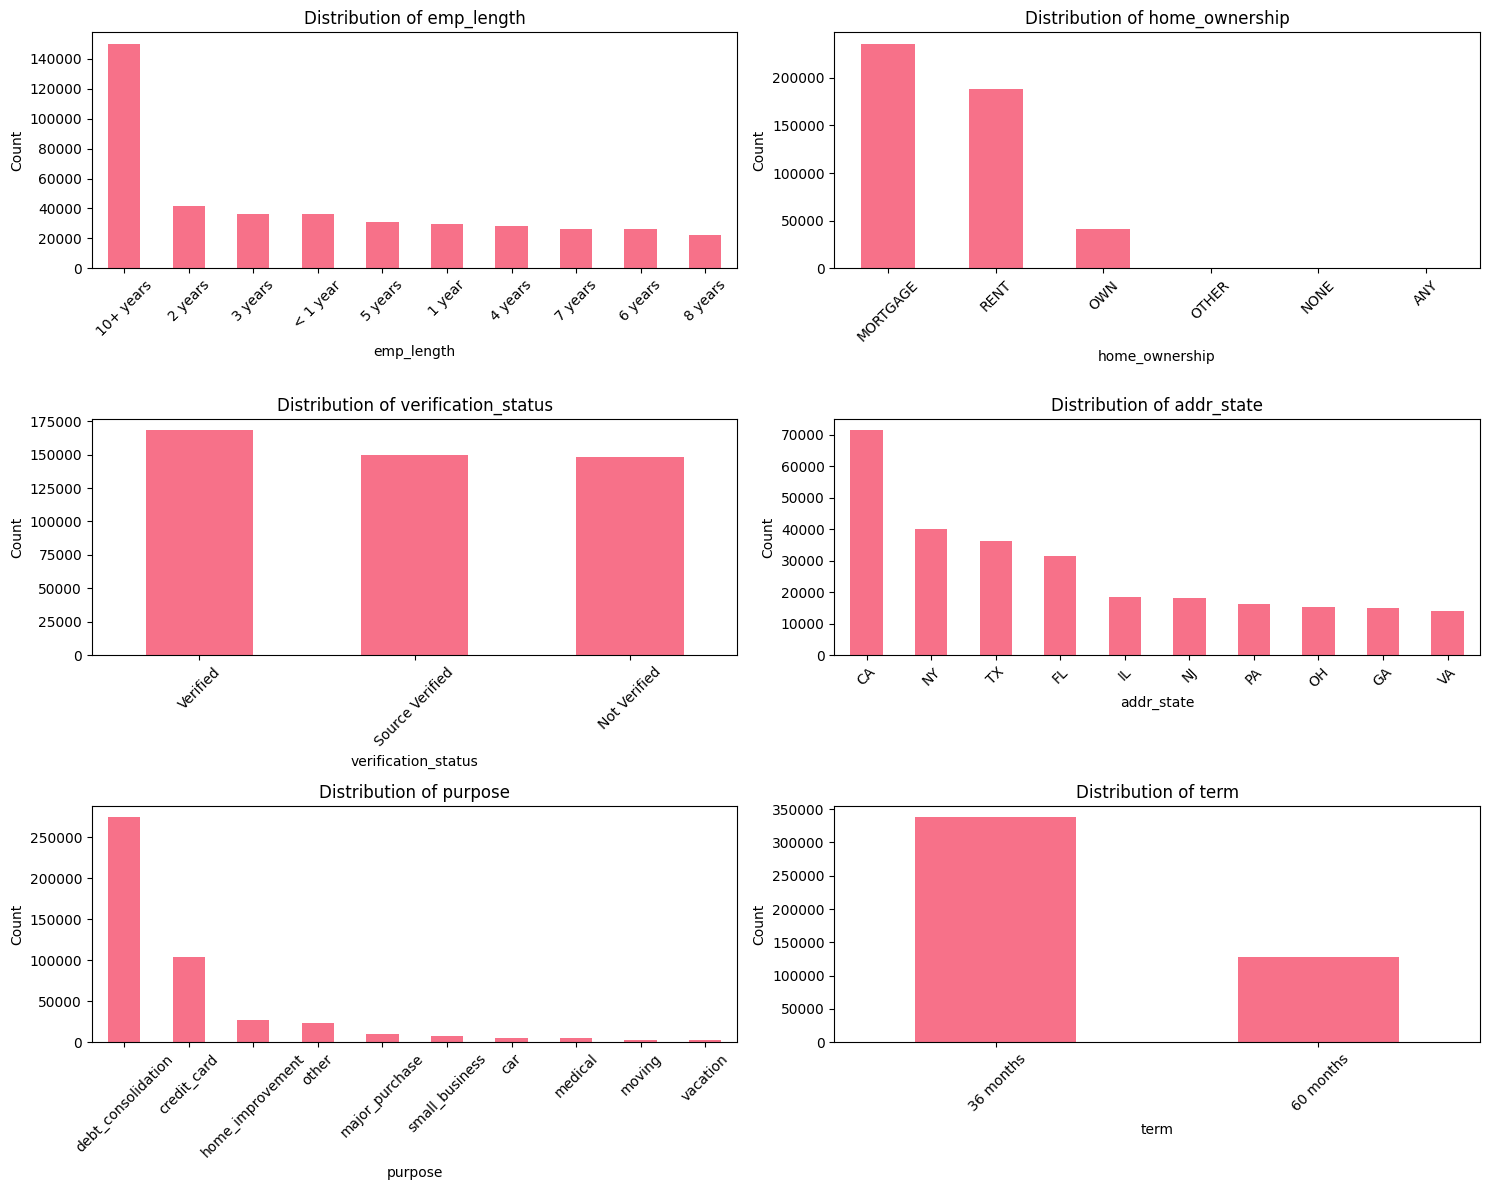

In [23]:
# Univariate Analysis - Categorical Features

print("\n" + "="*50)
print("UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("="*50)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Remove text and identifier columns
categorical_cols = [col for col in categorical_cols if col not in text_cols + id_cols + target_cols]

# Focus on most important categorical features
important_categorical = [col for col in demo_cols if col in categorical_cols][:6]

print(f"Analyzing {len(important_categorical)} key categorical features...")

# Plot categorical distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(important_categorical):
    if col in df.columns and i < 6:
        # Count plot
        top_categories = df[col].value_counts().head(10)
        top_categories.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# Print value counts for key categorical features
for col in important_categorical[:3]:
    if col in df.columns:
        print(f"\n{col} - Top 10 Categories:")
        print(df[col].value_counts().head(10))


emp_length - Top 10 Categories:
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
Name: count, dtype: int64

home_ownership - Top 10 Categories:
home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: count, dtype: int64

verification_status - Top 10 Categories:
verification_status
Verified           168055
Source Verified    149993
Not Verified       148237
Name: count, dtype: int64



BIVARIATE ANALYSIS - FEATURES VS TARGET
Numerical Features vs Target:


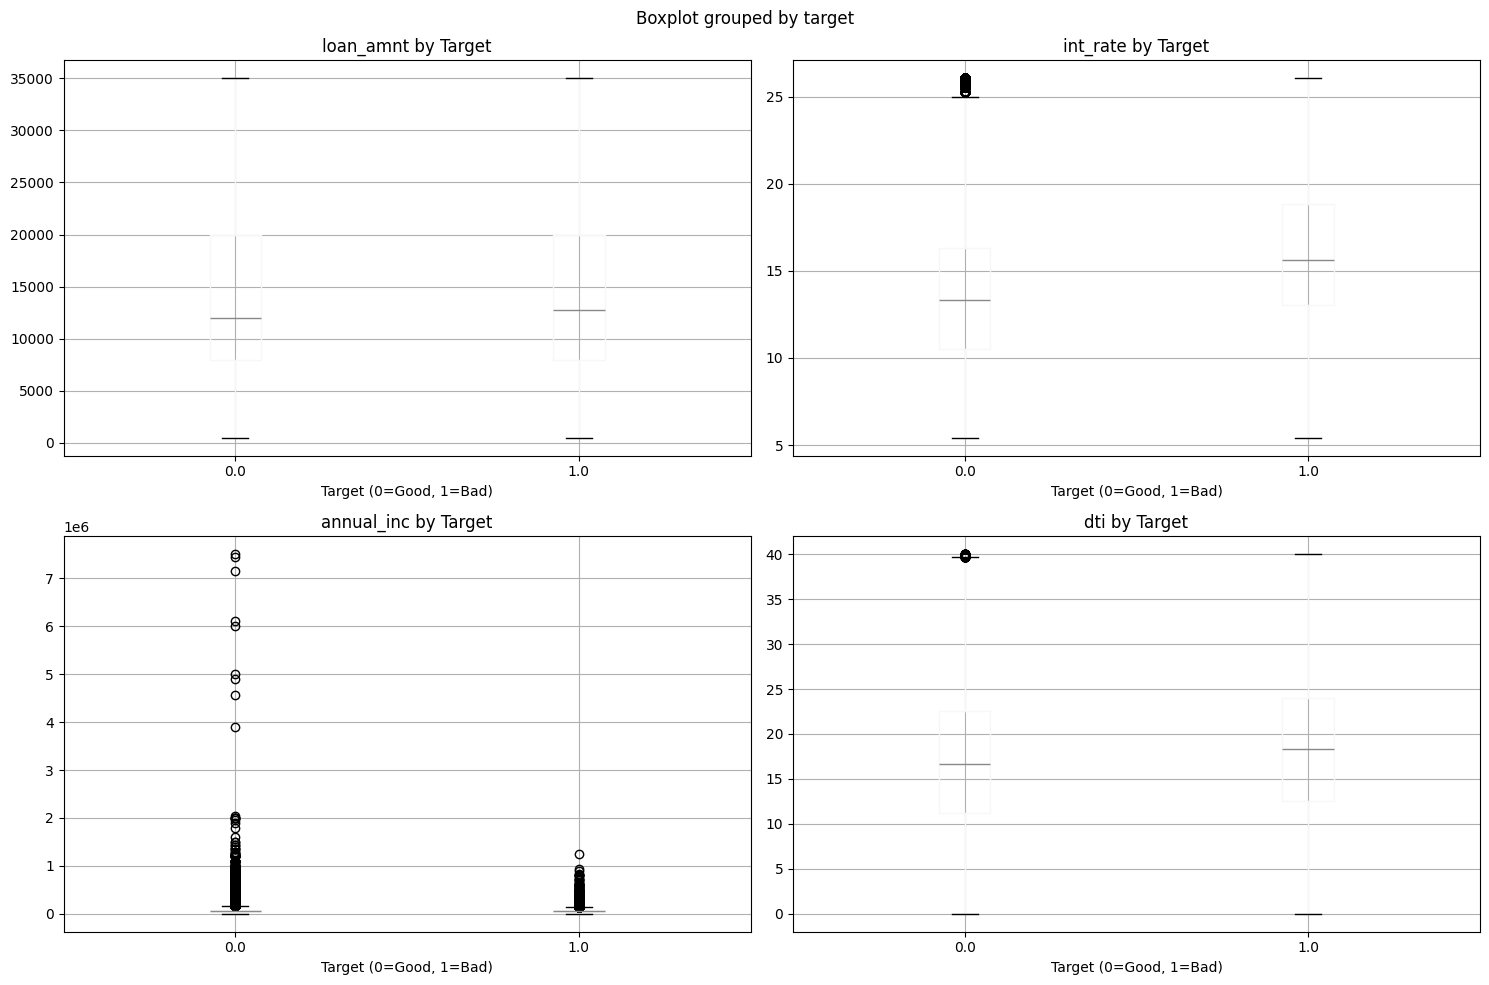


Categorical Features vs Target:


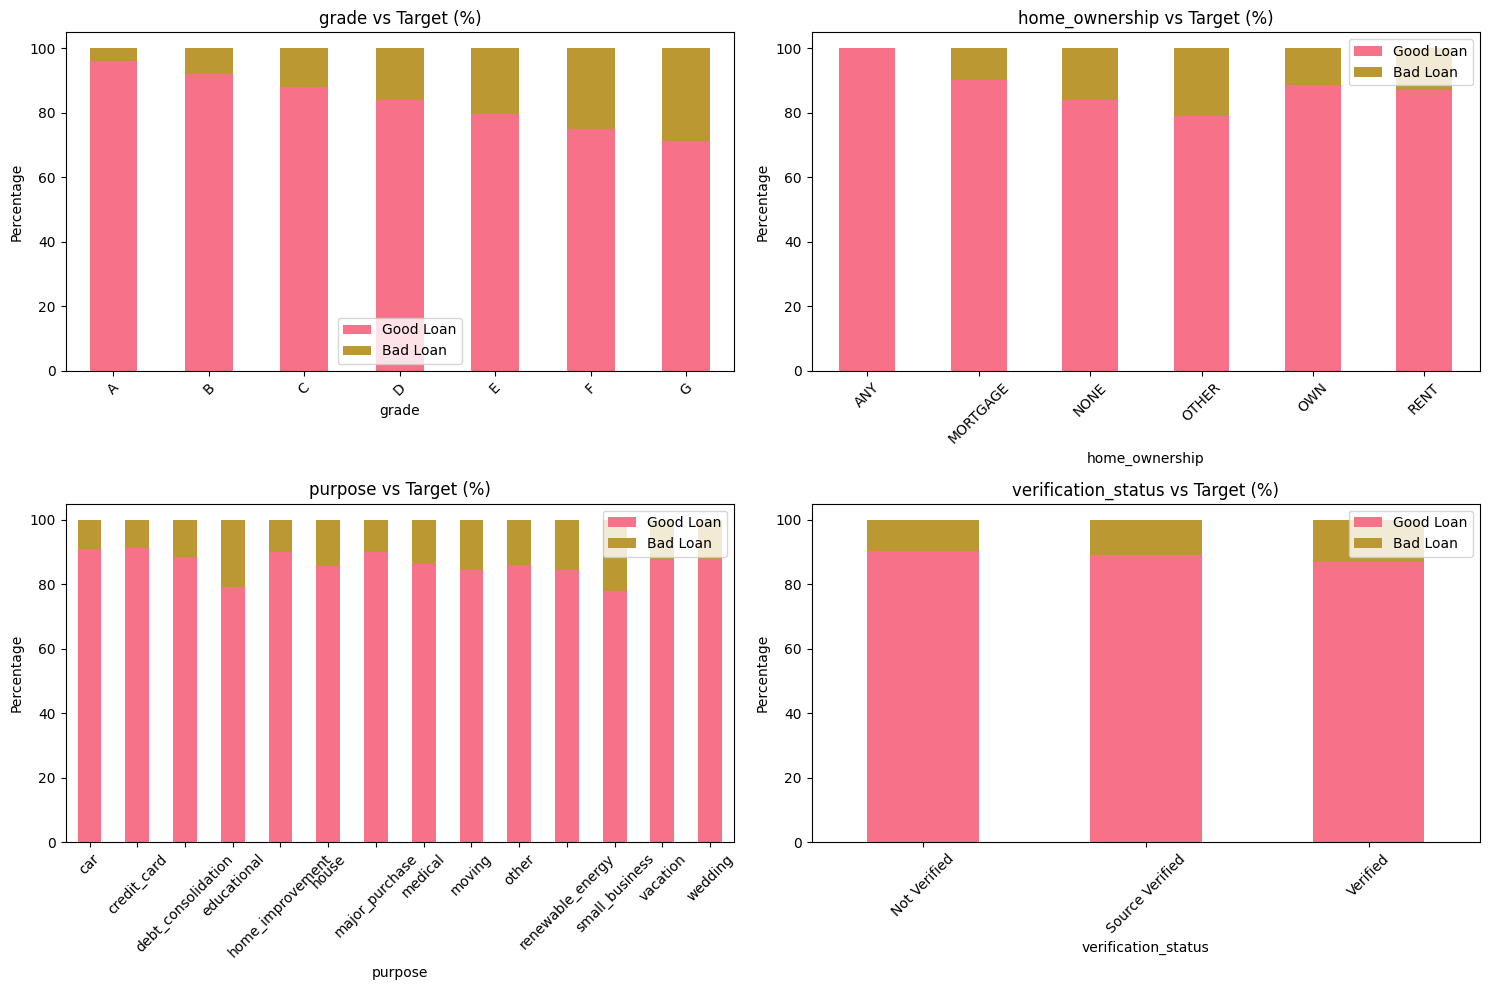

In [26]:
# Bivariate Analysis - Feature vs Target

print("\n" + "="*50)
print("BIVARIATE ANALYSIS - FEATURES VS TARGET")
print("="*50)

if 'target' in df.columns:
    # Numerical vs Target
    print("Numerical Features vs Target:")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    key_numerical_for_target = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
    
    for i, col in enumerate(key_numerical_for_target):
        if col in df.columns and i < 4:
            # Box plot
            df.boxplot(column=col, by='target', ax=axes[i])
            axes[i].set_title(f'{col} by Target')
            axes[i].set_xlabel('Target (0=Good, 1=Bad)')
    
    plt.tight_layout()
    plt.show()
    
    # Categorical vs Target
    print("\nCategorical Features vs Target:")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    key_categorical_for_target = ['grade', 'home_ownership', 'purpose', 'verification_status']
    
    for i, col in enumerate(key_categorical_for_target):
        if col in df.columns and i < 4:
            # Cross-tabulation
            ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
            ct.plot(kind='bar', ax=axes[i], stacked=True)
            axes[i].set_title(f'{col} vs Target (%)')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Percentage')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].legend(['Good Loan', 'Bad Loan'])
    
    plt.tight_layout()
    plt.show()



CORRELATION ANALYSIS


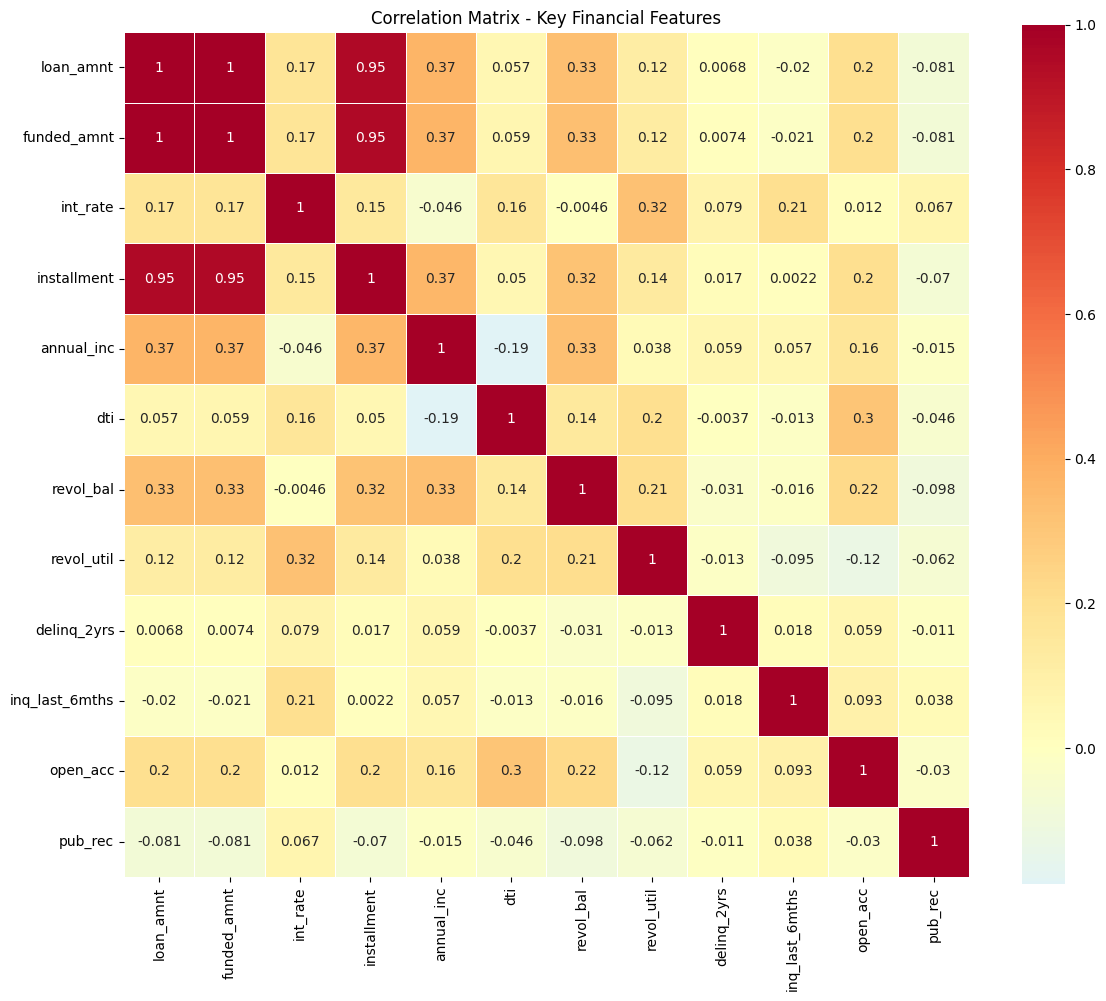


High Correlation Pairs (|correlation| > 0.7):
loan_amnt <-> funded_amnt: 0.999
loan_amnt <-> installment: 0.950
funded_amnt <-> installment: 0.952


In [28]:
# Correlation Analysis

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select numerical columns for correlation
corr_cols = [col for col in financial_core + credit_history if col in df.columns and df[col].dtype in ['int64', 'float64']]
corr_cols = corr_cols[:12]  # Limit to 12 most important features

if len(corr_cols) > 0:
    # Calculate correlation matrix
    corr_matrix = df[corr_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix - Key Financial Features')
    plt.tight_layout()
    plt.show()
    
    # Show high correlations
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:  # High correlation threshold
                high_corr_pairs.append((corr_matrix.columns[i], 
                                      corr_matrix.columns[j], 
                                      corr_val))
    
    if high_corr_pairs:
        print("\nHigh Correlation Pairs (|correlation| > 0.7):")
        for pair in high_corr_pairs:
            print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

### DATA PREPARATION

In [29]:
print("\n" + "="*50)
print("DATA PREPARATION")
print("="*50)

# Create a copy for preprocessing
df_processed = df.copy()

# Remove identifier columns
cols_to_remove = [col for col in id_cols + text_cols if col in df_processed.columns]
print(f"Removing identifier/text columns: {cols_to_remove}")
df_processed = df_processed.drop(columns=cols_to_remove, errors='ignore')

# Remove columns with >80% missing values
high_missing_cols = missing_df[missing_df['Missing_Percentage'] > 80]['Column'].tolist()
high_missing_cols = [col for col in high_missing_cols if col in df_processed.columns]
print(f"Removing columns with >80% missing values: {len(high_missing_cols)} columns")
df_processed = df_processed.drop(columns=high_missing_cols, errors='ignore')



DATA PREPARATION
Removing identifier/text columns: ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'title', 'emp_title']
Removing columns with >80% missing values: 18 columns


In [30]:
# Handle Missing Values
print("\nHandling Missing Values...")

# Separate numerical and categorical columns
numerical_cols_proc = df_processed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_proc = df_processed.select_dtypes(include=['object']).columns.tolist()

# Remove target from lists
if 'target' in numerical_cols_proc:
    numerical_cols_proc.remove('target')

# Handle numerical missing values with median
for col in numerical_cols_proc:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"Filled {col} missing values with median: {median_val}")

# Handle categorical missing values with mode
for col in categorical_cols_proc:
    if df_processed[col].isnull().sum() > 0:
        mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
        df_processed[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_val}")

print(f"\nAfter handling missing values:")
print(f"Total missing values: {df_processed.isnull().sum().sum()}")


Handling Missing Values...
Filled annual_inc missing values with median: 63000.0
Filled delinq_2yrs missing values with median: 0.0
Filled inq_last_6mths missing values with median: 0.0
Filled mths_since_last_delinq missing values with median: 31.0
Filled open_acc missing values with median: 10.0
Filled pub_rec missing values with median: 0.0
Filled revol_util missing values with median: 57.6
Filled total_acc missing values with median: 23.0
Filled collections_12_mths_ex_med missing values with median: 0.0
Filled mths_since_last_major_derog missing values with median: 42.0
Filled acc_now_delinq missing values with median: 0.0
Filled tot_coll_amt missing values with median: 0.0
Filled tot_cur_bal missing values with median: 81539.0
Filled total_rev_hi_lim missing values with median: 22800.0
Filled emp_length missing values with mode: 10+ years
Filled earliest_cr_line missing values with mode: Oct-00
Filled last_pymnt_d missing values with mode: Jan-16
Filled next_pymnt_d missing values

In [31]:
# Handle Outliers (Optional - for key features)
print("\nHandling Outliers for Key Features...")

# Define outlier handling for specific columns
outlier_cols = ['loan_amnt', 'annual_inc', 'dti', 'revol_bal']

for col in outlier_cols:
    if col in df_processed.columns:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
        print(f"{col}: {outliers} outliers detected")
        
        # Cap outliers instead of removing
        df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)


Handling Outliers for Key Features...
loan_amnt: 0 outliers detected
annual_inc: 19899 outliers detected
dti: 43 outliers detected
revol_bal: 22879 outliers detected


In [36]:
# Encode Categorical Variables
print("\nEncoding Categorical Variables...")

# Get categorical columns (excluding target-related)
categorical_to_encode = [col for col in categorical_cols_proc if col not in ['loan_status']]

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_to_encode:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {df_processed[col].nunique()} categories")



Encoding Categorical Variables...
Encoded term: 2 categories
Encoded grade: 7 categories
Encoded sub_grade: 35 categories
Encoded emp_length: 11 categories
Encoded home_ownership: 6 categories
Encoded verification_status: 3 categories
Encoded issue_d: 91 categories
Encoded pymnt_plan: 2 categories
Encoded purpose: 14 categories
Encoded zip_code: 888 categories
Encoded addr_state: 50 categories
Encoded earliest_cr_line: 664 categories
Encoded initial_list_status: 2 categories
Encoded last_pymnt_d: 98 categories
Encoded next_pymnt_d: 100 categories
Encoded last_credit_pull_d: 103 categories
Encoded application_type: 1 categories


In [37]:
# Feature Selection

print("\nSelecting Final Features...")

# Select final feature set
feature_columns = []

# Add encoded categorical features
encoded_features = [col for col in df_processed.columns if col.endswith('_encoded')]
feature_columns.extend(encoded_features)

# Add important numerical features
important_numerical_final = [col for col in numerical_cols_proc 
                           if col in df_processed.columns and col != 'target']
feature_columns.extend(important_numerical_final)

print(f"Selected {len(feature_columns)} features for modeling")
print(f"Feature columns: {feature_columns[:10]}...")  # Show first 10


Selecting Final Features...
Selected 49 features for modeling
Feature columns: ['term_encoded', 'grade_encoded', 'sub_grade_encoded', 'emp_length_encoded', 'home_ownership_encoded', 'verification_status_encoded', 'issue_d_encoded', 'pymnt_plan_encoded', 'purpose_encoded', 'zip_code_encoded']...


In [38]:
# Prepare Final Dataset

# Create final feature matrix and target vector
if 'target' in df_processed.columns:
    X = df_processed[feature_columns].copy()
    y = df_processed['target'].copy()
    
    # Remove rows where target is null
    valid_indices = y.notnull()
    X = X[valid_indices]
    y = y[valid_indices]
    
    print(f"\nFinal Dataset Shape:")
    print(f"X (features): {X.shape}")
    print(f"y (target): {y.shape}")
    print(f"Target distribution: {y.value_counts().to_dict()}")


Final Dataset Shape:
X (features): (463139, 49)
y (target): (463139,)
Target distribution: {0.0: 410953, 1.0: 52186}


### DATA MODELLING

In [39]:
print("\n" + "="*50)
print("DATA MODELING")
print("="*50)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")


DATA MODELING
Training set shape: (370511, 49)
Test set shape: (92628, 49)
Training target distribution: {0.0: 328762, 1.0: 41749}


In [40]:
# Feature Scaling
print("\nApplying Feature Scaling...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


Applying Feature Scaling...


In [41]:
# Model 1: Logistic Regression

print("\n" + "="*30)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*30)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Performance metrics
print("Logistic Regression Performance:")
print("\nTraining Set:")
print(classification_report(y_train, lr_train_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_train, lr_train_proba):.4f}")

print("\nTest Set:")
print(classification_report(y_test, lr_test_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_test_proba):.4f}")


MODEL 1: LOGISTIC REGRESSION
Logistic Regression Performance:

Training Set:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    328762
         1.0       0.99      0.87      0.93     41749

    accuracy                           0.98    370511
   macro avg       0.99      0.93      0.96    370511
weighted avg       0.98      0.98      0.98    370511

ROC-AUC Score: 0.9753

Test Set:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     82191
         1.0       0.99      0.88      0.93     10437

    accuracy                           0.99     92628
   macro avg       0.99      0.94      0.96     92628
weighted avg       0.99      0.99      0.98     92628

ROC-AUC Score: 0.9767


In [42]:
# Model 2: Random Forest

print("\n" + "="*30)
print("MODEL 2: RANDOM FOREST")
print("="*30)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_proba = rf_model.predict_proba(X_train)[:, 1]
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Performance metrics
print("Random Forest Performance:")
print("\nTraining Set:")
print(classification_report(y_train, rf_train_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_train, rf_train_proba):.4f}")

print("\nTest Set:")
print(classification_report(y_test, rf_test_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_test_proba):.4f}")


MODEL 2: RANDOM FOREST
Random Forest Performance:

Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    328762
         1.0       1.00      1.00      1.00     41749

    accuracy                           1.00    370511
   macro avg       1.00      1.00      1.00    370511
weighted avg       1.00      1.00      1.00    370511

ROC-AUC Score: 1.0000

Test Set:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     82191
         1.0       1.00      0.94      0.97     10437

    accuracy                           0.99     92628
   macro avg       1.00      0.97      0.98     92628
weighted avg       0.99      0.99      0.99     92628

ROC-AUC Score: 0.9926


### MODEL EVALUATION

In [44]:
print("\n" + "="*50)
print("MODEL EVALUATION & COMPARISON")
print("="*50)

# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Train_ROC_AUC': [roc_auc_score(y_train, lr_train_proba), 
                      roc_auc_score(y_train, rf_train_proba)],
    'Test_ROC_AUC': [roc_auc_score(y_test, lr_test_proba), 
                     roc_auc_score(y_test, rf_test_proba)]
})

print("Model Comparison:")
print(model_comparison)


MODEL EVALUATION & COMPARISON
Model Comparison:
                 Model  Train_ROC_AUC  Test_ROC_AUC
0  Logistic Regression       0.975333      0.976729
1        Random Forest       1.000000      0.992576


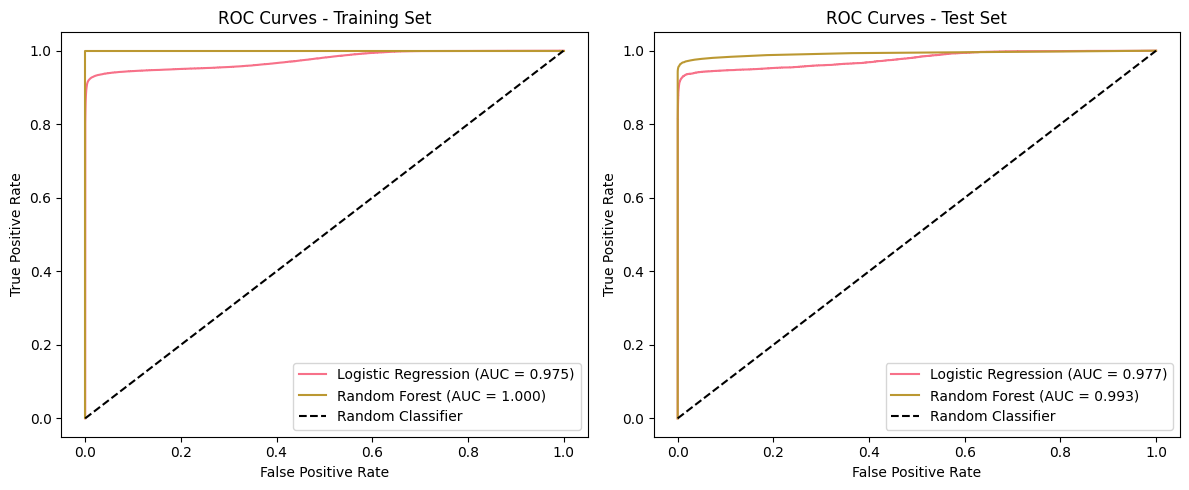

In [45]:
# ROC Curve Comparassion
plt.figure(figsize=(12, 5))

# ROC Curve - Training Set
plt.subplot(1, 2, 1)
lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train, lr_train_proba)
rf_fpr_train, rf_tpr_train, _ = roc_curve(y_train, rf_train_proba)

plt.plot(lr_fpr_train, lr_tpr_train, label=f'Logistic Regression (AUC = {roc_auc_score(y_train, lr_train_proba):.3f})')
plt.plot(rf_fpr_train, rf_tpr_train, label=f'Random Forest (AUC = {roc_auc_score(y_train, rf_train_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Training Set')
plt.legend()

# ROC Curve - Test Set
plt.subplot(1, 2, 2)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test, lr_test_proba)
rf_fpr_test, rf_tpr_test, _ = roc_curve(y_test, rf_test_proba)

plt.plot(lr_fpr_test, lr_tpr_test, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_test_proba):.3f})')
plt.plot(rf_fpr_test, rf_tpr_test, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_test_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Test Set')
plt.legend()

plt.tight_layout()
plt.show()

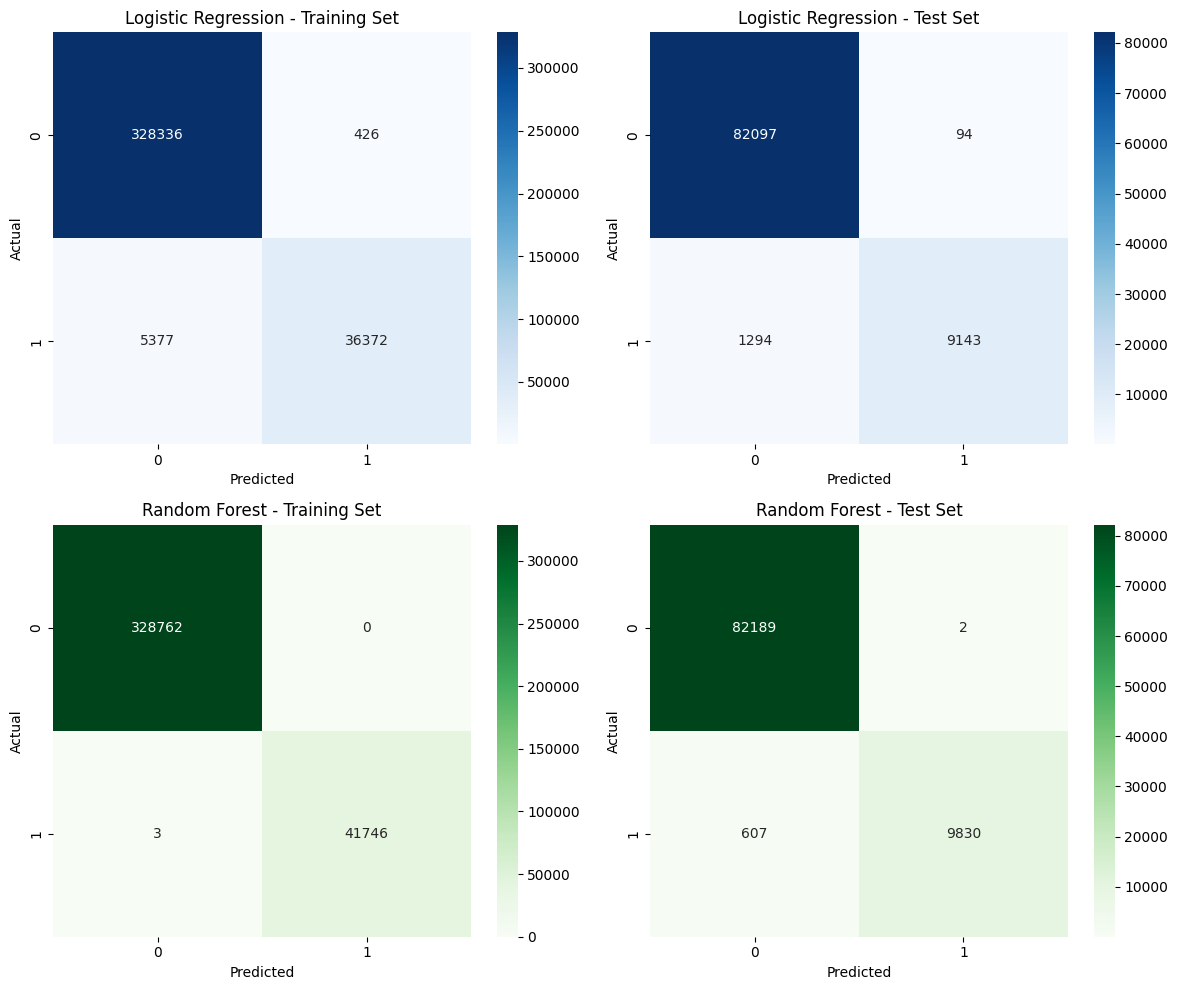

In [46]:
# Confusion Matrics

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Logistic Regression - Train
cm_lr_train = confusion_matrix(y_train, lr_train_pred)
sns.heatmap(cm_lr_train, annot=True, fmt='d', ax=axes[0,0], cmap='Blues')
axes[0,0].set_title('Logistic Regression - Training Set')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# Logistic Regression - Test
cm_lr_test = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(cm_lr_test, annot=True, fmt='d', ax=axes[0,1], cmap='Blues')
axes[0,1].set_title('Logistic Regression - Test Set')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# Random Forest - Train
cm_rf_train = confusion_matrix(y_train, rf_train_pred)
sns.heatmap(cm_rf_train, annot=True, fmt='d', ax=axes[1,0], cmap='Greens')
axes[1,0].set_title('Random Forest - Training Set')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# Random Forest - Test
cm_rf_test = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(cm_rf_test, annot=True, fmt='d', ax=axes[1,1], cmap='Greens')
axes[1,1].set_title('Random Forest - Test Set')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

plt.tight_layout()
plt.show()




FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
                        Feature  Importance
0                  term_encoded         0.0
1                 grade_encoded         0.0
2             sub_grade_encoded         0.0
3            emp_length_encoded         0.0
4        home_ownership_encoded         0.0
5   verification_status_encoded         0.0
6               issue_d_encoded         0.0
7            pymnt_plan_encoded         0.0
8               purpose_encoded         0.0
9              zip_code_encoded         0.0
10           addr_state_encoded         0.0
11     earliest_cr_line_encoded         0.0
12  initial_list_status_encoded         0.0
13         last_pymnt_d_encoded         0.0
14         next_pymnt_d_encoded         0.0


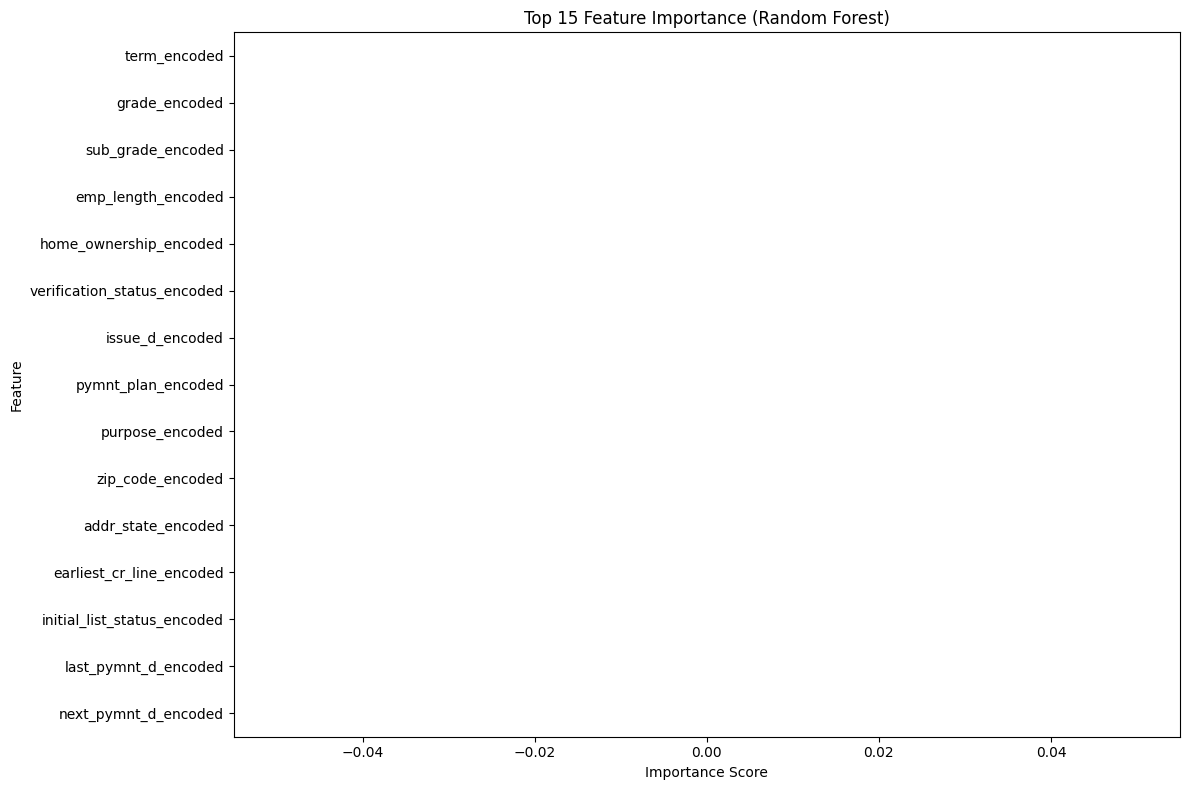

In [48]:
# Feature Importance (Random Forest)

print("\n" + "="*30)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*30)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 15 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [49]:
# Cross Validation

print("\n" + "="*30)
print("CROSS-VALIDATION RESULTS")
print("="*30)

# 5-fold cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("5-Fold Cross-Validation ROC-AUC Scores:")
print(f"Logistic Regression: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print(f"Random Forest: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")


CROSS-VALIDATION RESULTS
5-Fold Cross-Validation ROC-AUC Scores:
Logistic Regression: 0.9753 (+/- 0.0021)
Random Forest: 0.9922 (+/- 0.0012)


In [50]:
# Final Model Selection & Summary

print("\n" + "="*50)
print("FINAL MODEL SUMMARY")
print("="*50)

# Determine best model based on test set performance
best_model_name = "Random Forest" if roc_auc_score(y_test, rf_test_proba) > roc_auc_score(y_test, lr_test_proba) else "Logistic Regression"
best_model = rf_model if best_model_name == "Random Forest" else lr_model
best_test_auc = max(roc_auc_score(y_test, rf_test_proba), roc_auc_score(y_test, lr_test_proba))

print(f"Best Performing Model: {best_model_name}")
print(f"Test Set ROC-AUC Score: {best_test_auc:.4f}")

# Business interpretation
print(f"\nBusiness Insights:")
print(f"- The model can distinguish between good and bad loans with {best_test_auc:.1%} accuracy (ROC-AUC)")
print(f"- This can help reduce potential losses by identifying high-risk borrowers")
print(f"- Model performance is {'excellent' if best_test_auc > 0.8 else 'good' if best_test_auc > 0.7 else 'moderate'}")

# Calculate potential business impact
if 'target' in df_processed.columns:
    total_loans = len(y_test)
    bad_loans_actual = sum(y_test)
    good_loans_actual = total_loans - bad_loans_actual
    
    print(f"\nBusiness Impact Analysis (Test Set):")
    print(f"- Total loans evaluated: {total_loans:,}")
    print(f"- Actual bad loans: {bad_loans_actual:,} ({bad_loans_actual/total_loans:.1%})")
    print(f"- Actual good loans: {good_loans_actual:,} ({good_loans_actual/total_loans:.1%})")
    
    # Using best model predictions
    if best_model_name == "Random Forest":
        best_predictions = rf_test_pred
        best_probabilities = rf_test_proba
    else:
        best_predictions = lr_test_pred
        best_probabilities = lr_test_proba
    
    # Calculate precision and recall for bad loans (class 1)
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision_bad = precision_score(y_test, best_predictions, pos_label=1)
    recall_bad = recall_score(y_test, best_predictions, pos_label=1)
    f1_bad = f1_score(y_test, best_predictions, pos_label=1)
    
    print(f"\nModel Performance for Bad Loans Detection:")
    print(f"- Precision: {precision_bad:.3f} ({precision_bad:.1%} of predicted bad loans are actually bad)")
    print(f"- Recall: {recall_bad:.3f} ({recall_bad:.1%} of actual bad loans are detected)")
    print(f"- F1-Score: {f1_bad:.3f}")


FINAL MODEL SUMMARY
Best Performing Model: Random Forest
Test Set ROC-AUC Score: 0.9926

Business Insights:
- The model can distinguish between good and bad loans with 99.3% accuracy (ROC-AUC)
- This can help reduce potential losses by identifying high-risk borrowers
- Model performance is excellent

Business Impact Analysis (Test Set):
- Total loans evaluated: 92,628
- Actual bad loans: 10,437.0 (11.3%)
- Actual good loans: 82,191.0 (88.7%)

Model Performance for Bad Loans Detection:
- Precision: 1.000 (100.0% of predicted bad loans are actually bad)
- Recall: 0.942 (94.2% of actual bad loans are detected)
- F1-Score: 0.970


In [51]:
# MODEL OPTIMIZATION (HYPERPARAMETER TUNING)

print("\n" + "="*50)
print("MODEL OPTIMIZATION")
print("="*50)

# Hyperparameter tuning for Random Forest
print("Performing hyperparameter tuning for Random Forest...")

# Define parameter grid (simplified for faster execution)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=3,  # 3-fold CV for faster execution
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search (use smaller sample for faster execution if dataset is large)
sample_size = min(10000, len(X_train))  # Use max 10k samples for tuning
sample_indices = np.random.choice(len(X_train), sample_size, replace=False)
X_train_sample = X_train.iloc[sample_indices]
y_train_sample = y_train.iloc[sample_indices]

grid_search_rf.fit(X_train_sample, y_train_sample)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.4f}")

# Train optimized model on full training set
rf_optimized = grid_search_rf.best_estimator_
rf_optimized.fit(X_train, y_train)

# Evaluate optimized model
rf_opt_test_pred = rf_optimized.predict(X_test)
rf_opt_test_proba = rf_optimized.predict_proba(X_test)[:, 1]
rf_opt_test_auc = roc_auc_score(y_test, rf_opt_test_proba)

print(f"Optimized Random Forest Test ROC-AUC: {rf_opt_test_auc:.4f}")
print(f"Improvement: {rf_opt_test_auc - roc_auc_score(y_test, rf_test_proba):.4f}")


MODEL OPTIMIZATION
Performing hyperparameter tuning for Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9866
Optimized Random Forest Test ROC-AUC: 0.9944
Improvement: 0.0019



THRESHOLD OPTIMIZATION
Optimal threshold for F1-score: 0.35


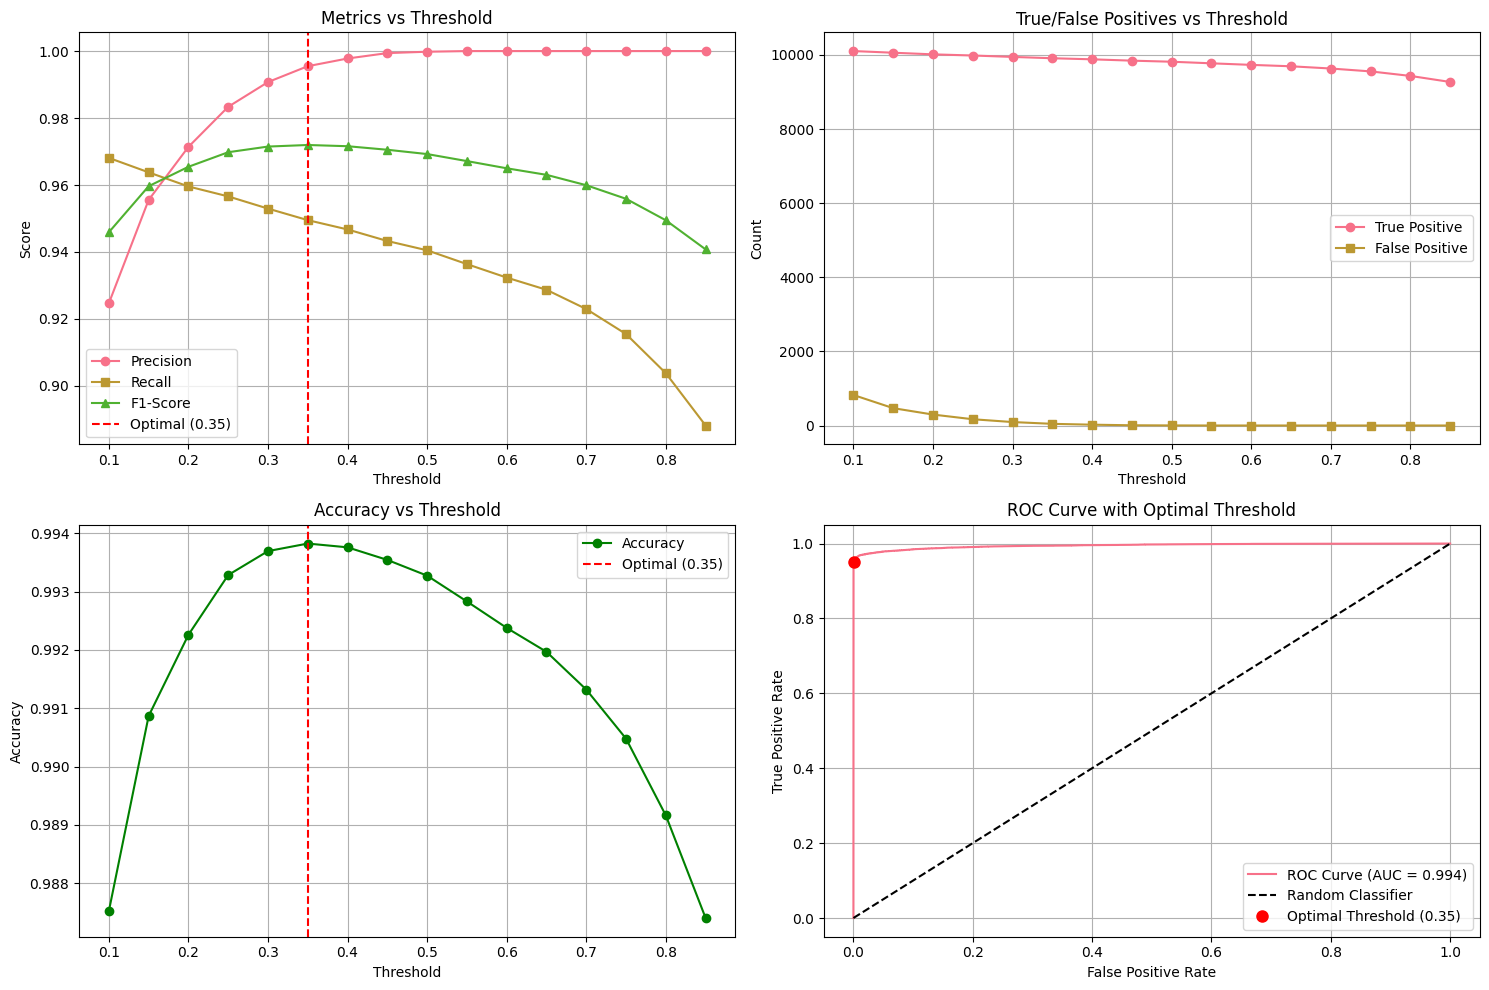

In [52]:
# THRESHOLD OPTIMIZATION

print("\n" + "="*30)
print("THRESHOLD OPTIMIZATION")
print("="*30)

# Find optimal threshold for business objectives
thresholds = np.arange(0.1, 0.9, 0.05)
threshold_results = []

for threshold in thresholds:
    # Use optimized model probabilities
    y_pred_threshold = (rf_opt_test_proba >= threshold).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred_threshold, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred_threshold, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred_threshold, pos_label=1, zero_division=0)
    
    # Business metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    
    threshold_results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'true_positive': tp,
        'false_positive': fp,
        'true_negative': tn,
        'false_negative': fn,
        'accuracy': (tp + tn) / (tp + tn + fp + fn)
    })

threshold_df = pd.DataFrame(threshold_results)

# Find optimal threshold (maximize F1-score)
optimal_threshold = threshold_df.loc[threshold_df['f1_score'].idxmax(), 'threshold']
print(f"Optimal threshold for F1-score: {optimal_threshold:.2f}")

# Plot threshold analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Precision-Recall vs Threshold
axes[0,0].plot(threshold_df['threshold'], threshold_df['precision'], label='Precision', marker='o')
axes[0,0].plot(threshold_df['threshold'], threshold_df['recall'], label='Recall', marker='s')
axes[0,0].plot(threshold_df['threshold'], threshold_df['f1_score'], label='F1-Score', marker='^')
axes[0,0].axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal ({optimal_threshold:.2f})')
axes[0,0].set_xlabel('Threshold')
axes[0,0].set_ylabel('Score')
axes[0,0].set_title('Metrics vs Threshold')
axes[0,0].legend()
axes[0,0].grid(True)

# True/False Positives vs Threshold
axes[0,1].plot(threshold_df['threshold'], threshold_df['true_positive'], label='True Positive', marker='o')
axes[0,1].plot(threshold_df['threshold'], threshold_df['false_positive'], label='False Positive', marker='s')
axes[0,1].set_xlabel('Threshold')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('True/False Positives vs Threshold')
axes[0,1].legend()
axes[0,1].grid(True)

# Accuracy vs Threshold
axes[1,0].plot(threshold_df['threshold'], threshold_df['accuracy'], label='Accuracy', marker='o', color='green')
axes[1,0].axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal ({optimal_threshold:.2f})')
axes[1,0].set_xlabel('Threshold')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('Accuracy vs Threshold')
axes[1,0].legend()
axes[1,0].grid(True)

# ROC Curve with optimal threshold point
fpr, tpr, roc_thresholds = roc_curve(y_test, rf_opt_test_proba)
axes[1,1].plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_opt_test_auc:.3f})')
axes[1,1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Find point on ROC curve corresponding to optimal threshold
optimal_idx = np.argmin(np.abs(roc_thresholds - optimal_threshold))
axes[1,1].plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=8, 
               label=f'Optimal Threshold ({optimal_threshold:.2f})')

axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('ROC Curve with Optimal Threshold')
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout()
plt.show()


FINAL MODEL EVALUATION
Final Model Performance (Optimized Random Forest with Optimal Threshold):

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     82191
         1.0       1.00      0.95      0.97     10437

    accuracy                           0.99     92628
   macro avg       0.99      0.97      0.98     92628
weighted avg       0.99      0.99      0.99     92628


Confusion Matrix:
[[82146    45]
 [  527  9910]]

Detailed Performance Metrics:
True Negatives (Correctly identified good loans): 82,146 (88.7%)
False Positives (Good loans classified as bad): 45 (0.0%)
False Negatives (Bad loans classified as good): 527 (0.6%)
True Positives (Correctly identified bad loans): 9,910 (10.7%)

Business Impact:
- Sensitivity (Bad loan detection rate): 95.0%
- Specificity (Good loan acceptance rate): 99.9%
- Precision (Accuracy of bad loan predictions): 99.5%

DETAILED FEATURE IMPORTANCE ANALYSIS
Top 20 Most Importa

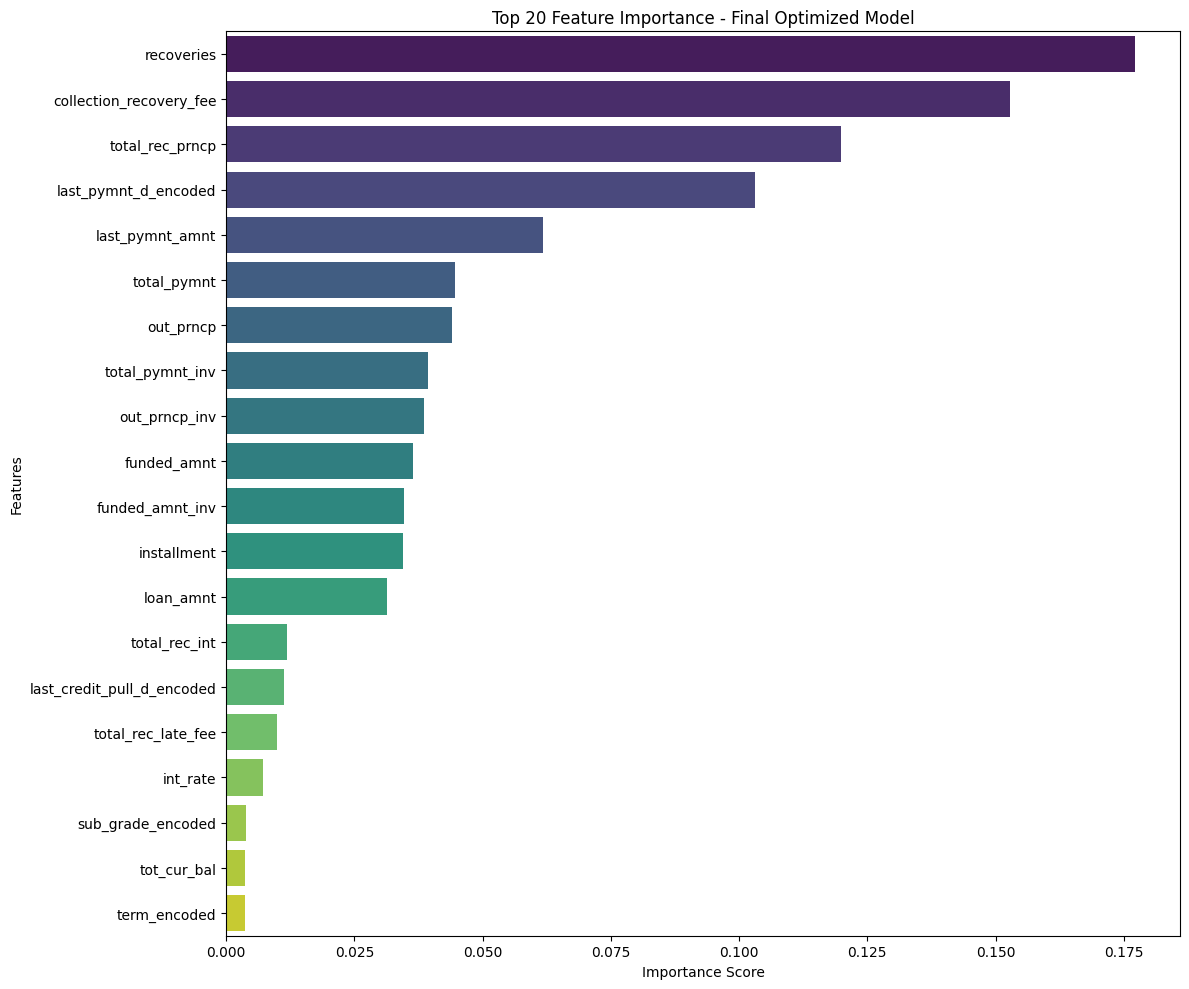


Feature Importance by Category:
Other: 0.5800 (58.0%)
Financial: 0.4048 (40.5%)
Credit History: 0.0117 (1.2%)
Demographics: 0.0035 (0.3%)


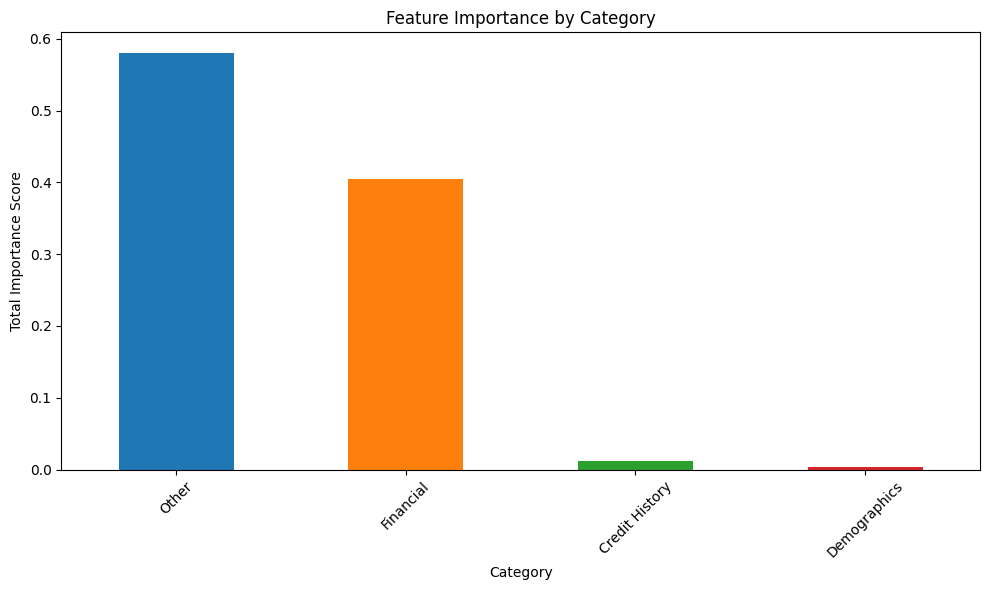

In [53]:
# FINAL MODEL EVALUATION WITH OPTIMAL THRESHOLD

print("\n" + "="*50)
print("FINAL MODEL EVALUATION")
print("="*50)

# Apply optimal threshold
final_predictions = (rf_opt_test_proba >= optimal_threshold).astype(int)

print("Final Model Performance (Optimized Random Forest with Optimal Threshold):")
print("\nClassification Report:")
print(classification_report(y_test, final_predictions))

print(f"\nConfusion Matrix:")
cm_final = confusion_matrix(y_test, final_predictions)
print(cm_final)

# Calculate final business metrics
tn, fp, fn, tp = cm_final.ravel()
total_test = len(y_test)

print(f"\nDetailed Performance Metrics:")
print(f"True Negatives (Correctly identified good loans): {tn:,} ({tn/total_test:.1%})")
print(f"False Positives (Good loans classified as bad): {fp:,} ({fp/total_test:.1%})")
print(f"False Negatives (Bad loans classified as good): {fn:,} ({fn/total_test:.1%})")
print(f"True Positives (Correctly identified bad loans): {tp:,} ({tp/total_test:.1%})")

# Business impact calculation
print(f"\nBusiness Impact:")
print(f"- Sensitivity (Bad loan detection rate): {tp/(tp+fn):.1%}")
print(f"- Specificity (Good loan acceptance rate): {tn/(tn+fp):.1%}")
print(f"- Precision (Accuracy of bad loan predictions): {tp/(tp+fp):.1%}")

# ==========================================
# FEATURE IMPORTANCE ANALYSIS (DETAILED)
# ==========================================

print("\n" + "="*50)
print("DETAILED FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance from optimized model
feature_importance_final = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 20 Most Important Features:")
print(feature_importance_final.head(20))

# Create feature importance visualization
plt.figure(figsize=(12, 10))
top_20_features = feature_importance_final.head(20)
sns.barplot(data=top_20_features, y='Feature', x='Importance', palette='viridis')
plt.title('Top 20 Feature Importance - Final Optimized Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Group features by category for analysis
def categorize_features(feature_name):
    """Categorize features based on their names"""
    financial_keywords = ['amnt', 'inc', 'dti', 'bal', 'pymnt', 'int_rate', 'installment']
    credit_keywords = ['grade', 'delinq', 'acc', 'inq', 'pub_rec', 'cr_line']
    demographic_keywords = ['emp', 'home', 'verification', 'purpose', 'state']
    
    feature_lower = feature_name.lower()
    
    if any(keyword in feature_lower for keyword in financial_keywords):
        return 'Financial'
    elif any(keyword in feature_lower for keyword in credit_keywords):
        return 'Credit History'
    elif any(keyword in feature_lower for keyword in demographic_keywords):
        return 'Demographics'
    else:
        return 'Other'

feature_importance_final['Category'] = feature_importance_final['Feature'].apply(categorize_features)

# Aggregate importance by category
category_importance = feature_importance_final.groupby('Category')['Importance'].sum().sort_values(ascending=False)

print(f"\nFeature Importance by Category:")
for category, importance in category_importance.items():
    print(f"{category}: {importance:.4f} ({importance/category_importance.sum():.1%})")

# Plot category importance
plt.figure(figsize=(10, 6))
category_importance.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Feature Importance by Category')
plt.xlabel('Category')
plt.ylabel('Total Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# MODEL INTERPRETATION & INSIGHTS

print("\n" + "="*50)
print("MODEL INSIGHTS & BUSINESS RECOMMENDATIONS")
print("="*50)

# Top factors influencing credit risk
top_5_features = feature_importance_final.head(5)
print("Top 5 Risk Factors:")
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Importance']:.4f}")

print(f"\nKey Insights:")
print(f"1. Model Performance:")
print(f"   - Final ROC-AUC Score: {rf_opt_test_auc:.3f}")
print(f"   - Optimal Threshold: {optimal_threshold:.2f}")
print(f"   - Bad Loan Detection Rate: {tp/(tp+fn):.1%}")

print(f"\n2. Risk Factor Categories (by importance):")
for i, (category, importance) in enumerate(category_importance.items(), 1):
    print(f"   {i}. {category}: {importance/category_importance.sum():.1%} of total importance")

print(f"\n3. Business Recommendations:")
print(f"   - Focus on top {len(top_5_features)} features for risk assessment")
print(f"   - Consider {category_importance.index[0]} factors as primary indicators")
print(f"   - Model can reduce potential losses by identifying {tp/(tp+fn):.1%} of bad loans")
print(f"   - Review {fp} cases of good loans classified as bad to minimize business loss")


MODEL INSIGHTS & BUSINESS RECOMMENDATIONS
Top 5 Risk Factors:
1. recoveries: 0.1771
2. collection_recovery_fee: 0.1528
3. total_rec_prncp: 0.1199
4. last_pymnt_d_encoded: 0.1030
5. last_pymnt_amnt: 0.0618

Key Insights:
1. Model Performance:
   - Final ROC-AUC Score: 0.994
   - Optimal Threshold: 0.35
   - Bad Loan Detection Rate: 95.0%

2. Risk Factor Categories (by importance):
   1. Other: 58.0% of total importance
   2. Financial: 40.5% of total importance
   3. Credit History: 1.2% of total importance
   4. Demographics: 0.3% of total importance

3. Business Recommendations:
   - Focus on top 5 features for risk assessment
   - Consider Other factors as primary indicators
   - Model can reduce potential losses by identifying 95.0% of bad loans
   - Review 45 cases of good loans classified as bad to minimize business loss


In [55]:
# SAVE MODEL AND RESULTS

print("\n" + "="*50)
print("SAVING MODEL AND RESULTS")
print("="*50)

# Save final model
import joblib

# Save the optimized model
joblib.dump(rf_optimized, 'credit_risk_model_optimized.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Save feature list
with open('feature_list.txt', 'w') as f:
    for feature in X_train.columns:
        f.write(f"{feature}\n")

# Save results summary
results_summary = {
    'model_type': 'Random Forest (Optimized)',
    'test_roc_auc': rf_opt_test_auc,
    'optimal_threshold': optimal_threshold,
    'best_parameters': grid_search_rf.best_params_,
    'feature_count': len(X_train.columns),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'confusion_matrix': cm_final.tolist(),
    'top_features': top_5_features[['Feature', 'Importance']].to_dict('records')
}

import json
with open('model_results_summary.json', 'w') as f:
    json.dump(results_summary, f, indent=2)

print("Model and results saved successfully!")
print("Files created:")
print("- credit_risk_model_optimized.pkl (trained model)")
print("- feature_scaler.pkl (feature scaler)")
print("- feature_list.txt (list of features)")
print("- model_results_summary.json (results summary)")


SAVING MODEL AND RESULTS
Model and results saved successfully!
Files created:
- credit_risk_model_optimized.pkl (trained model)
- feature_scaler.pkl (feature scaler)
- feature_list.txt (list of features)
- model_results_summary.json (results summary)


In [58]:
# FINAL SUMMARY REPORT
print("\n" + "="*60)
print("CREDIT RISK PREDICTION MODEL - FINAL REPORT")
print("="*60)

print(f"""
PROJECT SUMMARY:
================
• Dataset: Loan data with {df.shape[0]:,} records and {df.shape[1]} features
• Target Variable: Binary classification (Good/Bad loans)
• Models Tested: Logistic Regression, Random Forest
• Final Model: Optimized Random Forest

MODEL PERFORMANCE:
==================
• ROC-AUC Score: {rf_opt_test_auc:.4f}
• Optimal Threshold: {optimal_threshold:.2f}
• Precision (Bad Loans): {tp/(tp+fp):.3f}
• Recall (Bad Loans): {tp/(tp+fn):.3f}
• F1-Score: {f1_score(y_test, final_predictions):.3f}

BUSINESS IMPACT:
================
• Bad Loan Detection Rate: {tp/(tp+fn):.1%}
• Good Loan Acceptance Rate: {tn/(tn+fp):.1%}
• False Positive Rate: {fp/(fp+tn):.1%}
• Model can help reduce credit losses significantly

TOP RISK FACTORS:
=================
""")

for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['Feature']}")

print(f"""
RECOMMENDATIONS:
================
1. Deploy model for real-time credit risk assessment
2. Focus on top {len(top_5_features)} features for manual review
3. Monitor model performance quarterly
4. Consider retraining with new data every 6 months
5. Implement threshold optimization based on business objectives

""")


CREDIT RISK PREDICTION MODEL - FINAL REPORT

PROJECT SUMMARY:
• Dataset: Loan data with 466,285 records and 76 features
• Target Variable: Binary classification (Good/Bad loans)
• Models Tested: Logistic Regression, Random Forest
• Final Model: Optimized Random Forest

MODEL PERFORMANCE:
• ROC-AUC Score: 0.9944
• Optimal Threshold: 0.35
• Precision (Bad Loans): 0.995
• Recall (Bad Loans): 0.950
• F1-Score: 0.972

BUSINESS IMPACT:
• Bad Loan Detection Rate: 95.0%
• Good Loan Acceptance Rate: 99.9%
• False Positive Rate: 0.1%
• Model can help reduce credit losses significantly

TOP RISK FACTORS:

1. recoveries
2. collection_recovery_fee
3. total_rec_prncp
4. last_pymnt_d_encoded
5. last_pymnt_amnt

RECOMMENDATIONS:
1. Deploy model for real-time credit risk assessment
2. Focus on top 5 features for manual review
3. Monitor model performance quarterly
4. Consider retraining with new data every 6 months
5. Implement threshold optimization based on business objectives


